In [169]:
import pandas as pd
import numpy as np
import scipy.stats as st 
import scipy.special as sp
import matplotlib.pyplot as plt

In [170]:
df1 = pd.read_excel("Projekt-2_Data.xlsx", sheet_name="Úloha 1")
df2 = pd.read_excel("Projekt-2_Data.xlsx", sheet_name="Úloha 2")

# ÚLOHA 1 – Bayesovské odhady
## a) Konjugované apriorní a aposteriorní rozdělení, prediktivní rozdělení
Náš expertní odhad pro náhodnou veličinou s Poissonovým rozdělením je, že by za každých 5 ms (5 časových intervalů) mělo nastat 10 připojení (celkově 10 výskytů události). Apriorní konjugované rozdělení tedy bude odpovídat
Gamma rozdělení s parametry $\alpha=10$ a $\beta=5$.

<!--
Máme náhodnou veličinu s Poissonovým rozdělením a expertní odhad, že každých 5 ms by mělo nastat 10 připojení. Expertní odhad můžeme reformulovat na znění, že průměrná doba mezi dvěma připojeními je 0.5 ms. Pak tento odhad odpovídá exponenciálnímu rozdělení s parametrem $\lambda = 2$. Dle Wikipedia je pro Poissonovo rozdělení vhodným konjugovaným apriorním rozdělením Gamma rozdělení. Hustota pravděpodobnosti (pdf) Gamma rozdělení je dána vztahem:
$$
pdf(x) = \frac{\beta^\alpha}{\Gamma(\alpha)} x^{\alpha - 1} e^{-\beta x}
$$
a vztah pto hustotu pravděpodobnosti expertního odhadu je následující:
$$
pdf(x) = \lambda e^{-\lambda x}.
$$
Pro parametry $\alpha$ a $\beta$ bude zřejmě platit následující, abychom mohli použít Gamma rozdělení jako konjugované apriorní rozdělení:
* $x^{\alpha - 1} = 1$, tzn., $\alpha - 1 = 0$ a tím pádem $\alpha = 1$
* $e^{-\beta x} = e^{-\lambda x}$, čili $\beta = \lambda$
* zbylé hodnoty jsou pouze multiplikativní konstanty, které nemají na polohu maxima vliv.

Správnost volby konjugovaného apriorního rozdělení pak ověříme graficky.
>

### 1) Apriorní a aposteriorní hustota parametru Poissonova rozdělení $\lambda$
Apriorní hustotu získáme jako hustotu Gamma rozdělení s parametry viz výše a aposteriorní hustota je hustota Gamma rozdělení s parametry $\alpha=10 + \sum^{n}_{i=1} x_i$ a $\beta=5+n$

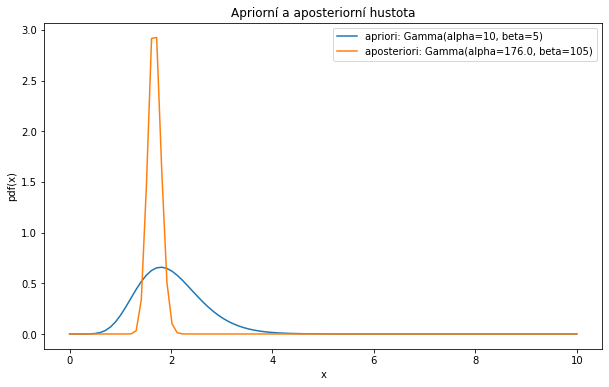

In [171]:
alpha_apriori = 10
beta_apriori = 5
plt.figure(figsize=(10, 6))
x = np.linspace(0, 10, 100)
y_apriori = st.gamma.pdf(x, alpha_apriori, 0, 1/beta_apriori)
observations = np.array(df1["uloha_1 a)"].dropna().values)
alpha_aposteriori = alpha_apriori + observations.sum()
beta_aposteriori = beta_apriori + observations.shape[0]
y_aposteriori = st.gamma.pdf(x, alpha_aposteriori, 0, 1/beta_aposteriori)
plt.title("Apriorní a aposteriorní hustota")
plt.xlabel("x")
plt.ylabel("pdf(x)")
plt.plot(x, y_apriori, label=f"apriori: Gamma(alpha={alpha_apriori}, beta={beta_apriori})")
plt.plot(x, y_aposteriori, label=f"aposteriori: Gamma(alpha={alpha_aposteriori}, beta={beta_aposteriori})")
plt.legend()
plt.show()

### 2) Apriorní a aposteriorní prediktivní hustota pozorovaní
Apriorní i aposteriorní prediktivní hustota vychází z negativního binomického rozdělení a je dána vztahem:
$$
pmf(k) = \binom{k+r-1}{k}(1-p)^kp^r.
$$
Pro apriorní hustotu jsou parametry dány jako $r=\alpha$ a $p=\beta/(\beta+1)$, pro aposteriorní hustotu jsou parametry pak následující $r=\alpha + \sum^{n}_{i=1} x_i$ a $p=(\beta+n)/(\beta+n+1)$

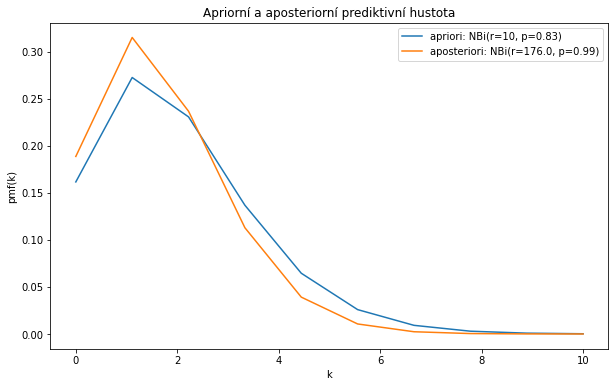

In [172]:
plt.figure(figsize=(10, 6))
k = np.linspace(0, 10, 10)
y_apriori = st.nbinom.pmf(k, alpha_apriori, beta_apriori/(beta_apriori+1))
observations = np.array(df1["uloha_1 a)"].dropna().values)
y_aposteriori = st.nbinom.pmf(k, alpha_aposteriori, beta_aposteriori/(beta_aposteriori+1))
plt.title("Apriorní a aposteriorní prediktivní hustota")
plt.xlabel("k")
plt.ylabel("pmf(k)")
plt.plot(k, y_apriori, label=f"apriori: NBi(r={alpha_apriori}, p={round(beta_apriori/(beta_apriori+1), 2)})")
plt.plot(k, y_aposteriori, label=f"aposteriori: NBi(r={alpha_aposteriori}, p={round(beta_aposteriori/(beta_aposteriori+1), 2)})")
plt.legend()
plt.show()

### 3) Porovnání intervalů spolehlivosti odhadu $\lambda$ z apriorního a aposteriorního rozdělení
Bodový odhad parametru $\lambda$ je dán střední hodnotou Gamma rozdělení s odpovídajícími parametry. 95% interval spolehlivosti odhadu parametru $\lambda$ tak bude dán 
intervalem ohraničeným 2,5 a  97,5 percentily Gamma rozdělení s odpovídajícími parametry.
<!--
Interval spolehlivosti odhadu parametru $\lambda$ je roven $(\hat{\lambda}g_{1-\alpha/2}, \hat{\lambda}g_{\alpha/2})$, kde:
* $\hat{\lambda}$ je bodový odhad parametru $\lambda$,
* $1 - \alpha$ je hladina významnosti,
* $g_{k}$ je $k$-tý percentil Gamma rozdělení.

Apriorního i aposteriorní rozdělení se řídí Gamma rozdělením, tzn., bodové odhady jejich parametrů $\lambda$ jsou dány následovně:
$$
\hat{\lambda} = \frac{\alpha + \sum^{n}_{i=1} x_i}{\beta + n}.
$$
!>

In [173]:
g_0025_apriori = st.gamma.ppf(0.025, alpha_apriori, 0, 1/beta_apriori)
g_0975_apriori = st.gamma.ppf(0.975, alpha_apriori, 0, 1/beta_apriori)
lambda_confidence_interval_apriori = (g_0025_apriori, g_0975_apriori)

observations = np.array(df1["uloha_1 a)"].dropna().values)
g_0025_aposteriori = st.gamma.ppf(0.025, alpha_aposteriori, 0, 1/beta_aposteriori)
g_0975_aposteriori = st.gamma.ppf(0.975, alpha_aposteriori, 0, 1/beta_aposteriori)
lambda_confidence_interval_aposteriori = (g_0025_aposteriori, g_0975_aposteriori)

print(f"Apriorní 95% interval spolehlivosti: {lambda_confidence_interval_apriori}")
print(f"Aposteriorní 95% interval spolehlivosti: {lambda_confidence_interval_aposteriori}")

Apriorní 95% interval spolehlivosti: (0.9590777392264868, 3.416960690283833)
Aposteriorní 95% interval spolehlivosti: (1.4376938284869922, 1.9327207471868797)


Z výsledků lze pozorovat, že aposteriorní 95% interval spolehlivosti má menší rozsah než apriorní 95% interval spolehlivosti. Tzn., že na základě pozorování jsme schopni se stejnou spolehlivostí poměrně významně zpřesnit odhad parametru $\lambda$.

### 4) Výběr dvou aposteriorních bodových odhadů parametru $\lambda$
Prvně vybereme parametr $\lambda$ jako střední hodnotou aposteriorního Gamma rozdělení, tj. jeho Bayesovský bodový odhad:
$$
\lambda_1 \overset{odhad}{=} \frac{10 + 166}{5 + 100}=1,6762
$$
Jako druhý bodový odhad parametru $\lambda$ zvolíme modus aposteriorního Gamma rozdělení:
$$\lambda_2 \overset{odhad}{=} \frac{10+166-1}{5+100} = 1,6667$$ 

Pokud bychom následně prováděli další sady pozorování, v průměru bychom se měli blížit k odhadu parametru $\lambda = 1,6762$ ($1,6762$ připojení za 1 ms), nejčastěji však bude odhad $\lambda = 1,6667$ ($1,6667$ připojení za 1 ms) pro danou sadu. 

### 5) Výběr apriorního a aposteriorního bodového odhadu počtu pozorování


In [174]:
observations_apriori = alpha_apriori * (1 - beta_apriori / (beta_apriori + 1)) / (beta_apriori / (beta_apriori + 1))
observations_aposteriori = alpha_aposteriori * (1 - beta_aposteriori / (beta_aposteriori + 1)) / (beta_aposteriori / (beta_aposteriori + 1))

print(f"Apriorní očekávaný počet pozorování: {observations_apriori}")
print(f"Aposteriorní očekávaný počet pozorování: {observations_aposteriori}")

Apriorní očekávaný počet pozorování: 1.9999999999999996
Aposteriorní očekávaný počet pozorování: 1.6761904761904758


Jako oba výběry zvolíme střední hodnoty negativních binomických rozdělení s odpovídajícími parametry, tj.:
$$počet\_pozorování_{apriori}=\frac{10 \cdot (1-0.83)}{0.83}=2,0$$
$$počet\_pozorování_{aposteriori}=\frac{176 \cdot (1-0.99)}{0.99}=1,6762$$

Z vybraných odhadů lze vidět, že pozorováním se poměrně významně posunul průměrný odhad počtu připojení za 1 ms z původního expertního odhadu.

## b) Aproximace diskrétním rozdělením
Postup bude následující:
1. Numericky zintegrujeme a normalizujeme funkci danou maximálními hodnotami *prior* měření pro každou skupinu, čímž dostaneme apriorní hustotu pravděpodobnosti rozdělení parametru $b$ $h(b)$, respektive pravděpodobnostní funkci rozdělení parametru $b$, protože numerickou integrací hustotu diskretizujeme. Diskretizaci provedeme na intervalu zdola ohraničeném minimem z maxim hodnot *prior* měření a shora maximem hodnot *prior* měření tak, že jej rovnoměrně rozdělíme na 50 podintervalů, které budeme uvažovat jako množinu diskrétních bodů (středy podintervalů) $B$. Jinde bude hodnota apriorní pravděpodobnostní funkce rozdělení parametru $b$ rovna 0.
2. Na vhodném diskretizovaném intervalu spočteme funkci věrohodnosti parametru $b$ $l(b)$ na základě *pozorování* a normalizujeme její hodnoty aplikováním funkce *Softmax*. Interval zdola ohraničíme maximem z hodnot *pozorování* a shora maximem z hodnot *prior* měření a funkci věrohodnosti tak budeme počítat pouze pro body z $B$, které náleží do tohoto intervalu, jinak její hodnota bude 0.
3. Aposteriorní pravděpodobnostní funkce $P(b)$ je pak dána vztahem $P(b)=(l(b)h(b))/k$, kde $k$ je nějaká konstanta, kterou lze vypočítat jako $k=\sum_{b_i \in B}l(b_i)h(b_i)$ tím, že $l(b)$ i $h(b)$ jsou diskrétní funkce. Zřejmě hodnota aposteriorní pravděpodobnostní funkce různá od 0 pouze na intervalu definovaném v bodě 2.
4. Apriorní pravděpodobnostní funkci, aposteriorní pravděpodobnostní funkci a funkci věrohodnosti interpolujeme zpět na spojité hustoty pomocí historgramů.

In [175]:
df_prior = df1[["uloha_1 b)_prior", "skupina"]]
df_prior = df_prior.groupby("skupina").agg(["max"])
prior_values = df_prior.values.flatten()

prior_hist_values, prior_hist_range = np.histogram(prior_values, bins=50)
prior_pmf = prior_hist_values / prior_hist_values.sum()
B_range = prior_hist_range[1:] + (prior_hist_range[1:] - prior_hist_range[:-1]) / 2

In [176]:
observations = df1["uloha_1 b)_pozorování"].dropna().values
observations_max = observations.max()
observations_argmax = np.argmax(B_range >= observations_max)
B_likelihood_range = B_range[observations_argmax:]

mean = 3
a = 1
scale = 1

log_likelihood_values = []
for b in B_likelihood_range:
    lower_bound = (a - mean)
    upper_bound = (b - mean)
    logpdf = st.truncnorm.logpdf(observations, lower_bound, upper_bound, loc=mean, scale=scale)
    log_likelihood_values.append(logpdf.sum())

likelihood = np.zeros(B_range.shape[0])
likelihood[observations_argmax:] = sp.softmax(log_likelihood_values)

In [177]:
posterior = prior_pmf * likelihood
posterior_pmf = posterior / posterior.sum()

### 1) Graf apriorní, aposteriorní hustotou a funkce věrohodnosti

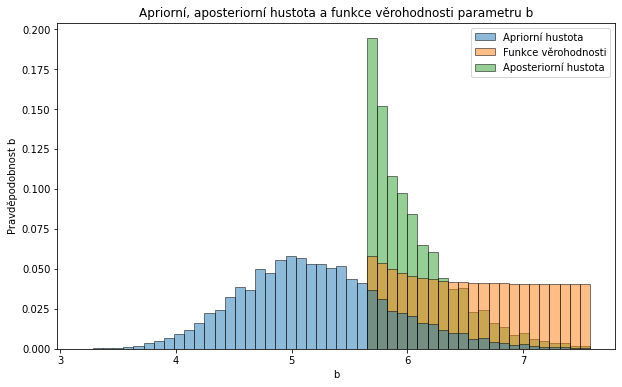

In [178]:
plt.figure(figsize=(10, 6))
plt.title("Apriorní, aposteriorní hustota a funkce věrohodnosti parametru b")
plt.xlabel("b")
plt.ylabel("Pravděpodobnost b")
plt.hist(B_range, bins=prior_hist_range, weights=prior_pmf, label="Apriorní hustota", alpha=0.5, edgecolor="black", zorder=3)
plt.hist(B_range, bins=prior_hist_range, weights=likelihood, label="Funkce věrohodnosti", alpha=0.5, edgecolor="black", zorder=2)
plt.hist(B_range, bins=prior_hist_range, weights=posterior_pmf, label="Aposteriorní hustota", alpha=0.5, edgecolor="black", zorder=1)
plt.legend()
plt.show()

### 2) 95% interval spolehlivosti parametru $b$
Interval spolehlivosti bude zdola ohraničen maximální hodnotou z *pozorování* a shora nejmenší hodnotou $b \in B$, pro kterou platí, že $P(X \le b) \ge 0.95$.  

In [188]:
prob_sum = 0
i = observations_argmax
while prob_sum < 0.95:
    prob_sum += posterior_pmf[i]
    i += 1

print(f"Aposteriorní 95% interval spolehlivosti parametru b: {observations_max, prior_hist_range[i+1]}")

Aposteriorní 95% interval spolehlivosti parametru b: (5.68281970810648, 6.877390768331228)


### 3) Bodové odhady parametru $b$
Jako bodové odhady si vybereme střední hodnotu a modus. Pro výpočet střední hodnoty opět využijeme diskretizace, modus pak je zřejmě z pohledu na graf dán maximem z hodnot *pozorování*.

In [192]:
mean = B_range @ posterior_pmf
modus = observations_max
print(f"Aposteriorní průměrná hodnota parametru b: {mean}")
print(f"Aposteriorní nejčastější hodnota parametru b: {modus}")

Aposteriorní průměrná hodnota parametru b: 6.061064737427018
Aposteriorní nejčastější hodnota parametru b: 5.68281970810648


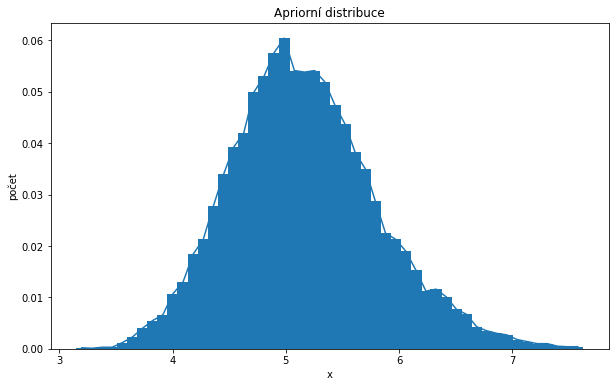

In [179]:
df_prior = df1[["uloha_1 b)_prior", "skupina"]]
df_prior = df_prior.groupby("skupina").agg(["max"])
prior_values = df_prior.values.flatten()
prior_values.sort()

i_values = 0
prior_hist = np.zeros(50)
for i, x in enumerate(np.linspace(prior_values[1], prior_values[-1], 50)):
    while i_values < prior_values.shape[0] and prior_values[i_values] <= x:
        i_values += 1
        prior_hist[i] += 1

prior_hist = prior_hist / prior_values.shape[0]

i_values = 0
prior_probs_dict = {}
previous = prior_values[0]
for i, x in enumerate(np.linspace(prior_values[1], prior_values[-1], 50)):
    prior_probs_dict[previous + (x - previous)] = prior_hist[i]
    previous = x

plt.figure(figsize=(10, 6))
plt.title("Apriorní distribuce")
plt.xlabel("x")
plt.ylabel("počet")
plt.plot(np.linspace(prior_values[1], prior_values[-1], 50), prior_hist)
plt.bar(prior_probs_dict.keys(), prior_probs_dict.values(), width=0.1)
plt.show()

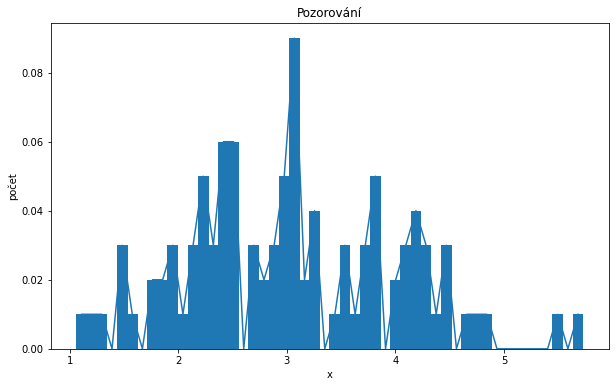

5.68281970810648

In [180]:
observations = df1["uloha_1 b)_pozorování"].dropna().values
observations.sort()

i_values = 0
observation_hist = np.zeros(50)
for i, x in enumerate(np.linspace(observations[0], observations[-1], 50)):
    while i_values < observations.shape[0] and observations[i_values] <= x:
        i_values += 1
        observation_hist[i] += 1
    
observation_hist = observation_hist / observations.shape[0]

i_values = 0
observation_probs_dict = {}
previous = observations[0]
for i, x in enumerate(np.linspace(observations[1], observations[-1], 50)):
    while i_values < observations.shape[0] and observations[i_values] <= x:
        observation_probs_dict[observations[i_values]] = observation_hist[i]
        i_values += 1

plt.figure(figsize=(10, 6))
plt.title("Pozorování")
plt.xlabel("x")
plt.ylabel("počet")
plt.plot(np.linspace(observations[1], observations[-1], 50), observation_hist)
plt.bar(np.linspace(observations[1], observations[-1], 50), observation_hist, width=0.1)
plt.show()

observations[-1]

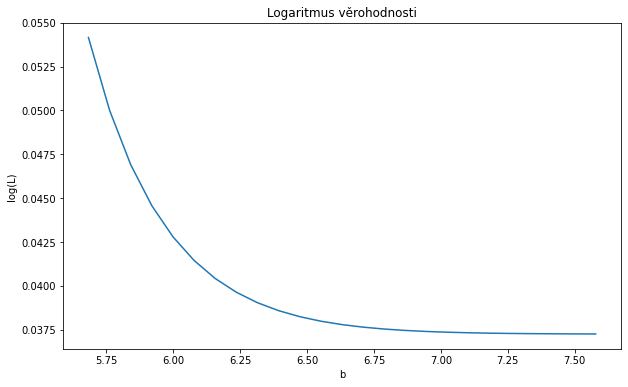

In [181]:
mean = 3
sigma = 1
a = 1
b_values = np.linspace(observations.max(), prior_values.max(), 25)

log_likelihood_values = []

for b in b_values:
    lower_bound = (a - mean)
    upper_bound = (b - mean)
    logpdf = st.truncnorm.logpdf(observations, lower_bound, upper_bound, loc=mean, scale=sigma)
    log_likelihood_values.append(np.sum(logpdf))

B_likelihood_dict = sp.softmax(log_likelihood_values)

plt.figure(figsize=(10, 6))
plt.title("Logaritmus věrohodnosti")
plt.xlabel("b")
plt.ylabel("log(L)")
plt.plot(b_values, B_likelihood_dict)
plt.show()

In [182]:
observation_probs = np.array([observation_probs_dict[x] for x in observations])
b_est = st.norm.pdf((observations - 3)) / (observation_probs + 0.0000001) + st.norm.cdf((1 - 3))
b_est = b_est / np.sum(b_est)
b_est

array([2.33191287e-06, 2.53569698e-06, 2.87639664e-06, 3.90849758e-01,
       1.44449324e-06, 1.50044556e-06, 1.51347858e-06, 6.08786018e-01,
       3.20048308e-06, 3.44786006e-06, 3.76529936e-06, 3.81120309e-06,
       3.81278498e-06, 2.65396255e-06, 8.76497102e-06, 3.30593115e-06,
       3.31098166e-06, 3.36263200e-06, 3.46623092e-06, 2.08621004e-06,
       2.10107257e-06, 2.13244778e-06, 2.18740125e-06, 2.23339486e-06,
       3.75208325e-06, 3.76473099e-06, 3.91898430e-06, 3.99318255e-06,
       3.99607755e-06, 2.05188609e-06, 2.06869009e-06, 2.07167973e-06,
       2.12169941e-06, 2.12265236e-06, 2.13115475e-06, 2.16926965e-06,
       2.17082038e-06, 2.17233459e-06, 4.68191123e-06, 4.69315959e-06,
       4.75741636e-06, 7.27522590e-06, 7.28745618e-06, 7.35286866e-06,
       4.92687174e-06, 4.97153426e-06, 4.98529263e-06, 4.98588845e-06,
       3.00659435e-06, 3.01404597e-06, 3.01429794e-06, 1.68400364e-06,
       1.68409423e-06, 1.68415913e-06, 1.68412362e-06, 1.68404326e-06,
      